## Compulsory Task 

Use the Titanic dataset provided to perform your analysis. Provide an indepth and creative EDA on the data set.

In [25]:
# Importing all libraries
import pandas as pd
import numpy as np
# for Box-Cox Transformation
from scipy import stats

# plotting modules
import seaborn as sns
import missingno

import matplotlib.colors as mcolors

import matplotlib.pyplot as plt

In [26]:
# Reading in titanic file and looking at the data
df = pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
# Dropping columns
# PassengerId: Unique identifier for each passenger and may not provide valuable insights into the survival patterns or any of my other analysis.
# Name: Unique and provide individual identification, they are unlikely to be directly correlated with the survival outcome or any of my other analysis.
# Ticket: Ticket numbers are specific to each passenger and may not have a significant impact on survival or any of my other analysis.
# Cabin: Due to high proportion of missing values 687/891
df = df.drop('PassengerId', axis=1)
df = df.drop('Name', axis=1)
df = df.drop('Ticket', axis=1)
df = df.drop('Cabin', axis=1)

In [58]:
# New data
df.head(100)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_group,fare_group
0,0,3,male,22.0,1,0,7.2500,S,adult,1-100
1,1,1,female,38.0,1,0,71.2833,C,adult,1-100
2,1,3,female,26.0,0,0,7.9250,S,adult,1-100
3,1,1,female,35.0,1,0,53.1000,S,adult,1-100
4,0,3,male,35.0,0,0,8.0500,S,adult,1-100
...,...,...,...,...,...,...,...,...,...,...
95,0,3,male,NaN,0,0,8.0500,S,NaN,1-100
96,0,1,male,71.0,0,0,34.6542,C,elderly,1-100
97,1,1,male,23.0,0,1,63.3583,C,adult,1-100
98,1,2,female,34.0,0,1,23.0000,S,adult,1-100


In [29]:
# Looking at all missing values
missing_values = df.isnull().sum()
print(missing_values)

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [30]:
# Looking at the columns and shape of data
print("Dataset shape: ", df.shape)
print("Features: ", df.columns[:])

Dataset shape:  (891, 8)
Features:  Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [31]:
# Examining the numerical values
print(df.describe())


         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


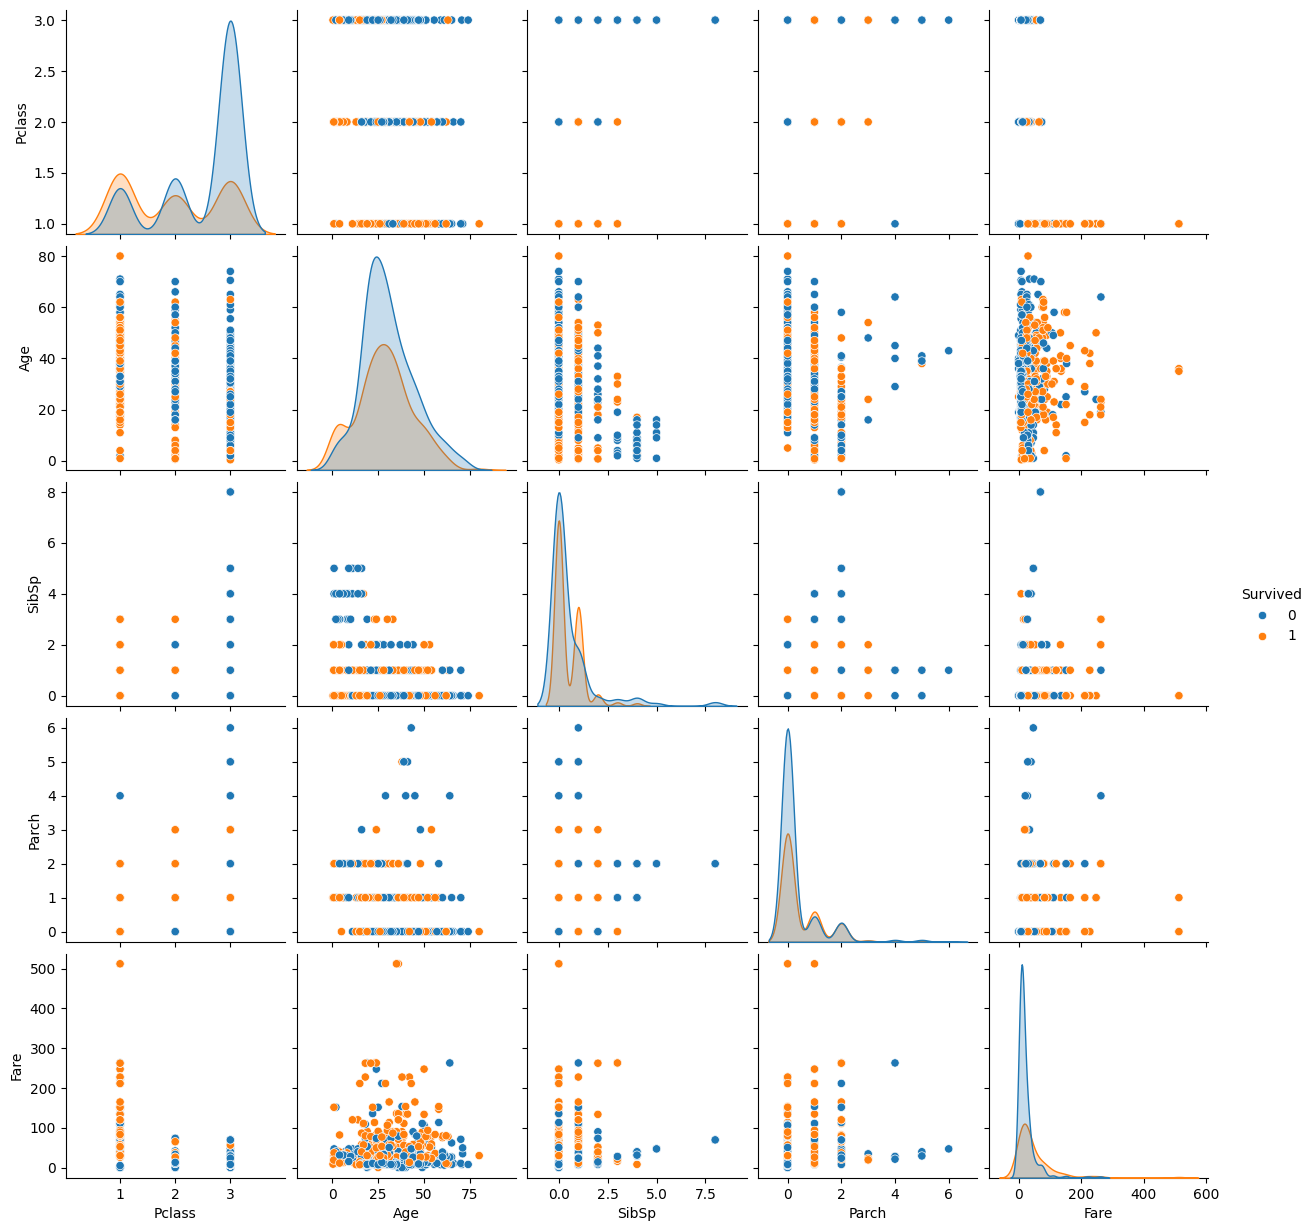

In [32]:
# Quick visualiation of data comparing 'Survived' column with every other column
sns.pairplot(df, hue= 'Survived')
plt.show()

### Task 
# What is the most important factor in determining survival of the Titanic incident.

Survived
0    549
1    342
Name: count, dtype: int64


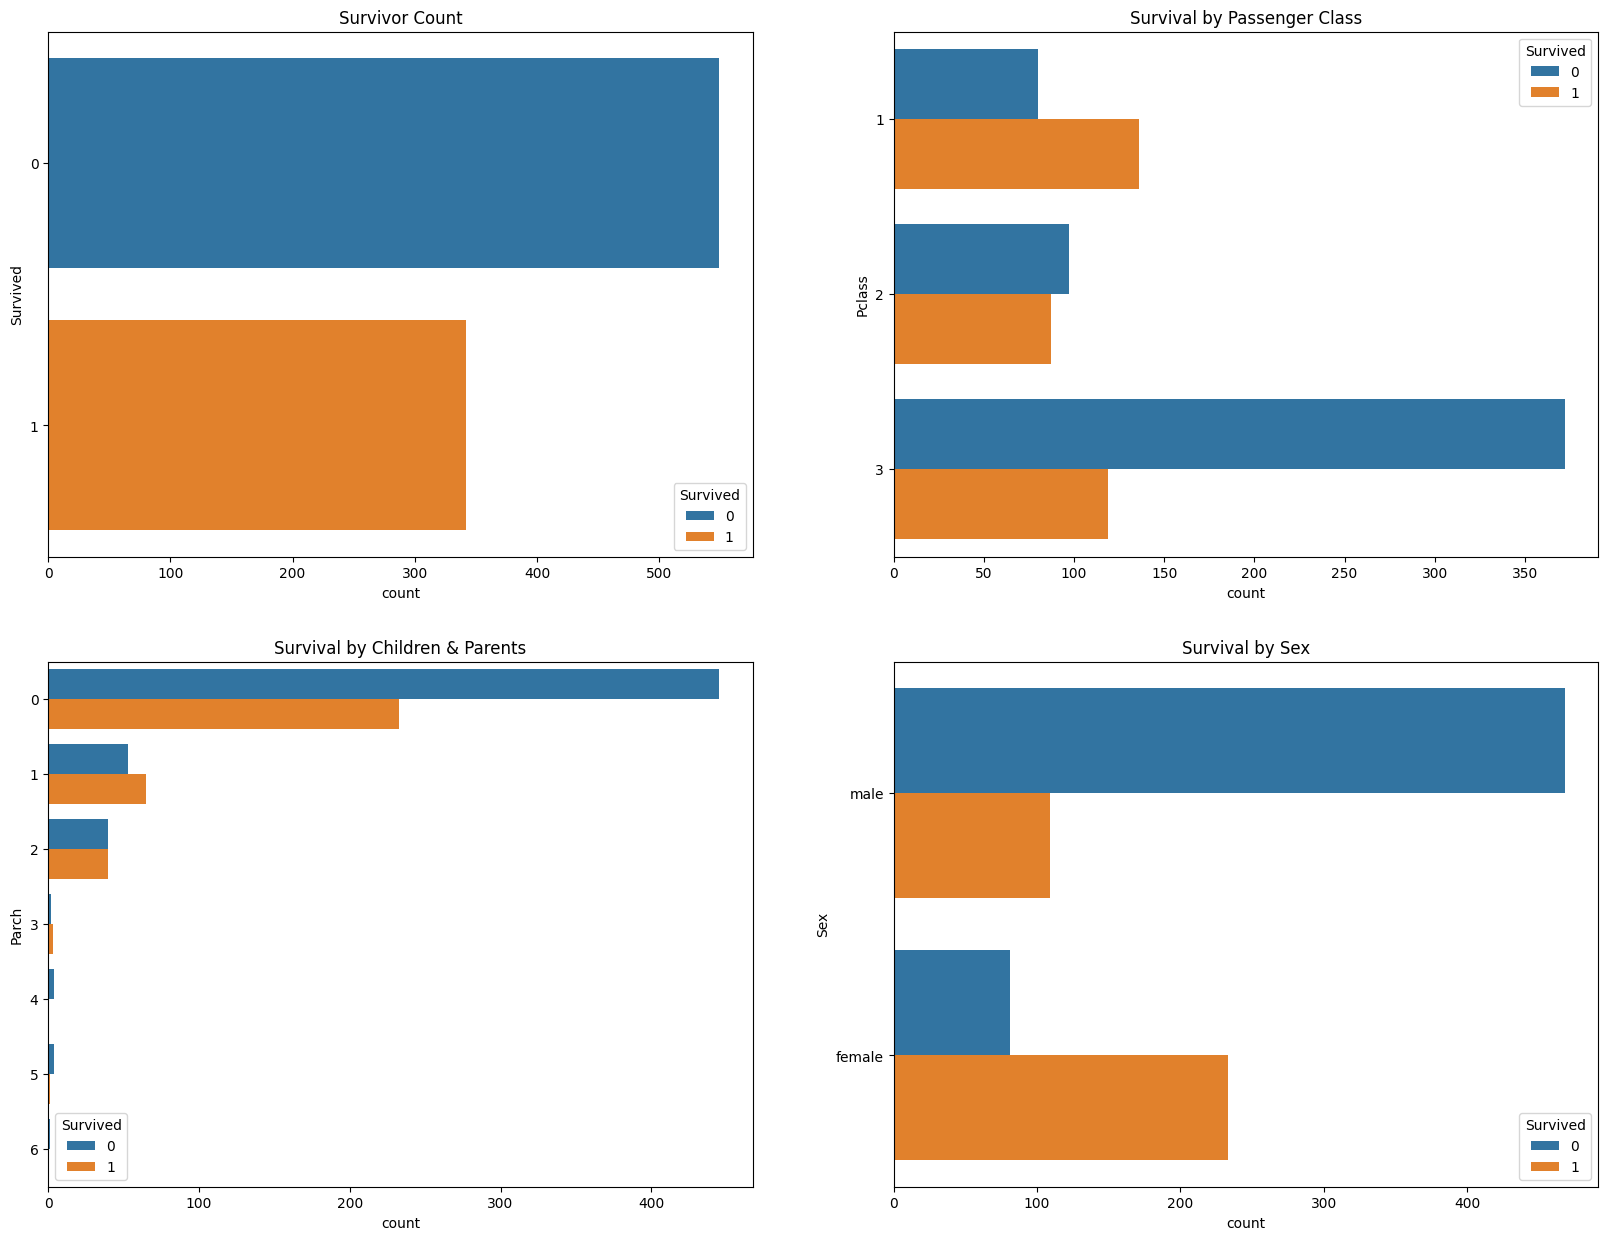

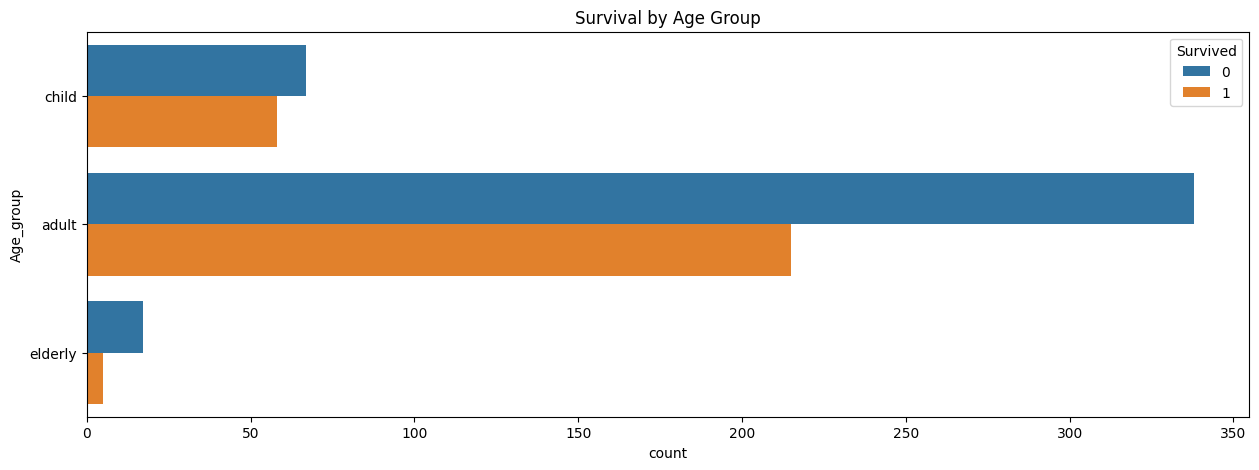

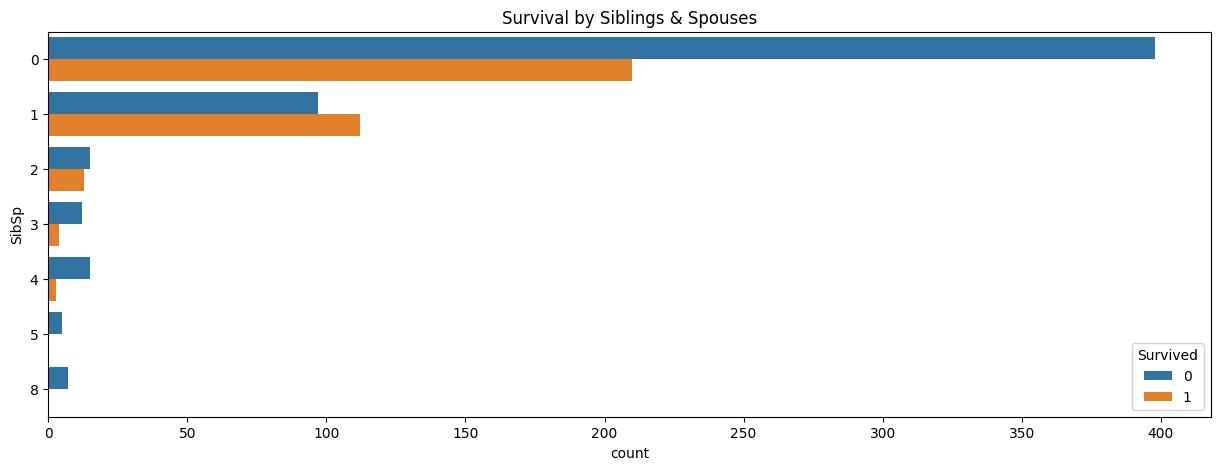

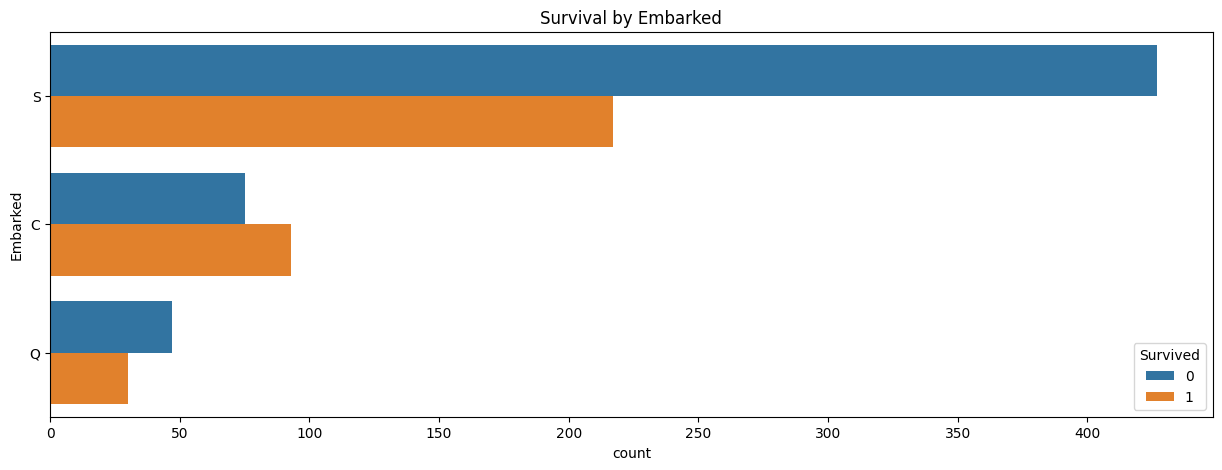

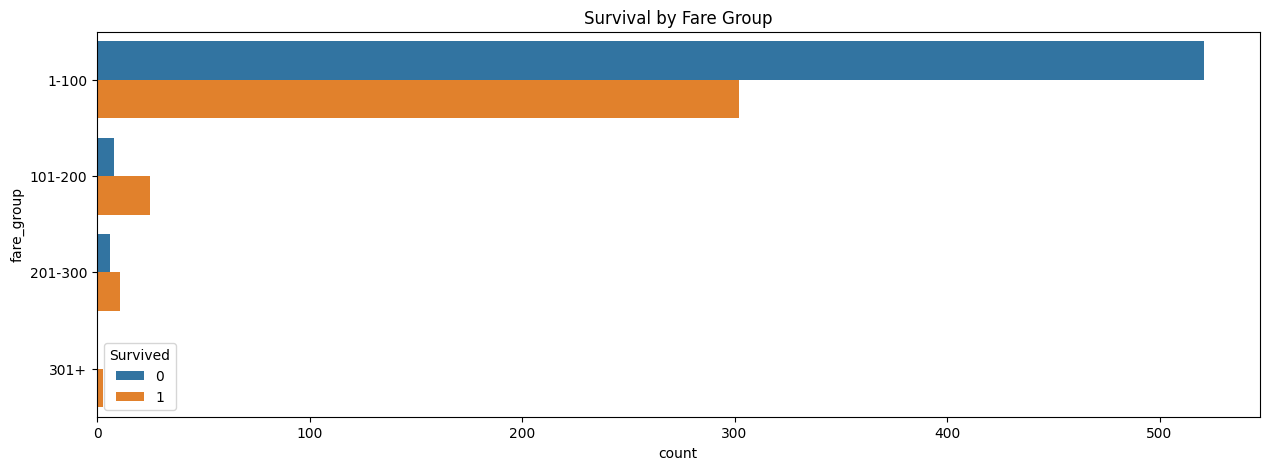

<Figure size 640x480 with 0 Axes>

In [33]:
# Visualisation of how many people survived with the 'Survived' column
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot(y='Survived', data=df, hue='Survived', ax=axs[0, 0])
axs[0, 0].set_title('Survivor Count')
print(df['Survived'].value_counts())  # Prints the count of survivors

# Visualisation to see if upper-class passengers were given preference on lifeboats
sns.countplot(y='Pclass', data=df, hue='Survived', ax=axs[0, 1])
axs[0, 1].set_title('Survival by Passenger Class')

# Visualisation of 'Survived' distribution within each 'children & parents' (Parch) group
sns.countplot(y='Parch', data=df, hue='Survived', ax=axs[1, 0])
axs[1, 0].set_title('Survival by Children & Parents')

# Visualisation of 'Survived' distribution within each 'Sex' group
sns.countplot(y='Sex', data=df, hue='Survived', ax=axs[1, 1])
axs[1, 1].set_title('Survival by Sex')

# Creating categorical age groups ('Age_group') based on the 'Age' column
df['Age_group'] = pd.cut(df['Age'], [1, 18, 60, 150], labels=['child', 'adult', 'elderly'])
# Visualisation of 'Survived' distribution within each 'Age_group'
fig = plt.figure(figsize=(15, 5))
sns.countplot(y='Age_group', data=df, hue='Survived')
plt.title('Survival by Age Group')
plt.show()

# Visualisation of 'Survived' distribution within each 'SibSp' (siblings & spouses) group
fig = plt.figure(figsize=(15, 5))
sns.countplot(y='SibSp', data=df, hue='Survived')
plt.title('Survival by Siblings & Spouses')
plt.show()

# Visualisation of 'Survived' distribution within each 'Embarked' group
fig = plt.figure(figsize=(15, 5))
sns.countplot(y='Embarked', data=df, hue='Survived')
plt.title('Survival by Embarked')
plt.show()

# Creating categorical fare groups ('fare_group') based on the 'Fare' column
df['fare_group'] = pd.cut(df['Fare'], [1, 100, 200, 300, np.inf], labels=['1-100', '101-200', '201-300', '301+'])
# Visualisation of 'Survived' distribution within each 'fare_group'
fig = plt.figure(figsize=(15, 5))
sns.countplot(y='fare_group', data=df, hue='Survived')
plt.title('Survival by Fare Group')
plt.show()

# Ensures proper spacing and layout
plt.tight_layout()
plt.show()

In [20]:
# This code calculates the sizes of groups formed by combining specific columns with the 'Survived' column in the DataFrame.
# print(df.groupby(['Sex', 'Survived'], observed=False).size())
# print(df.groupby(['Parch', 'Survived'], observed=False).size())
# print(df.groupby(['Pclass', 'Survived'], observed=False).size())
# print(df.groupby(['SibSp', 'Survived'], observed=False).size())
# print(df.groupby(['Embarked', 'Survived'], observed=False).size())
# print(df.groupby(['Age_group', 'Survived'], observed=False).size())
# print(df.groupby(['fare_group', 'Survived'], observed=False).size())


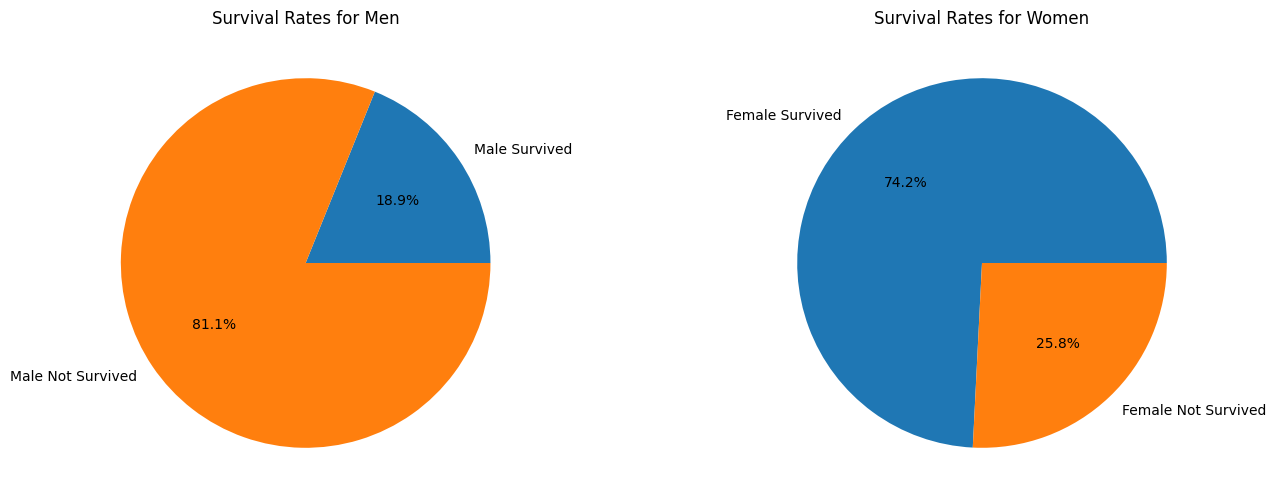

In [36]:
# Subset data for male and female passengers who survived and did not survive
df_male = df[df['Sex'] == 'male']
df_female = df[df['Sex'] == 'female']

# Count the number of male and female survivors and non-survivors
male_survived_count = df_male[df_male['Survived'] == 1].shape[0]
male_not_survived_count = df_male[df_male['Survived'] == 0].shape[0]
female_survived_count = df_female[df_female['Survived'] == 1].shape[0]
female_not_survived_count = df_female[df_female['Survived'] == 0].shape[0]


# Generate the two pie charts for male and female survival/non-survival rates
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot for Male Survival and Non-Survival Rates
plt.subplot(1, 2, 1)
labels_male = ['Male Survived', 'Male Not Survived']
sizes_male = [male_survived_count, male_not_survived_count]
plt.pie(sizes_male, labels=labels_male, autopct='%1.1f%%')
plt.title('Survival Rates for Men')

# Plot for Female Survival and Non-Survival Rates
plt.subplot(1, 2, 2)
labels_female = ['Female Survived', 'Female Not Survived']
sizes_female = [female_survived_count, female_not_survived_count]
plt.pie(sizes_female, labels=labels_female, autopct='%1.1f%%')
plt.title('Survival Rates for Women')

plt.show()

## Task Answer:
The passengers' chances of survival during the Titanic incident were influenced by multiple factors, and among these factors, gender played a crucial role. According to the pie chart above, it is evident that 74.2% of females survived, whereas only 18.9% of men survived.

### Task 
# In the movie, the upper-class passengerswere given preference on lifeboats. Does this show in the data?

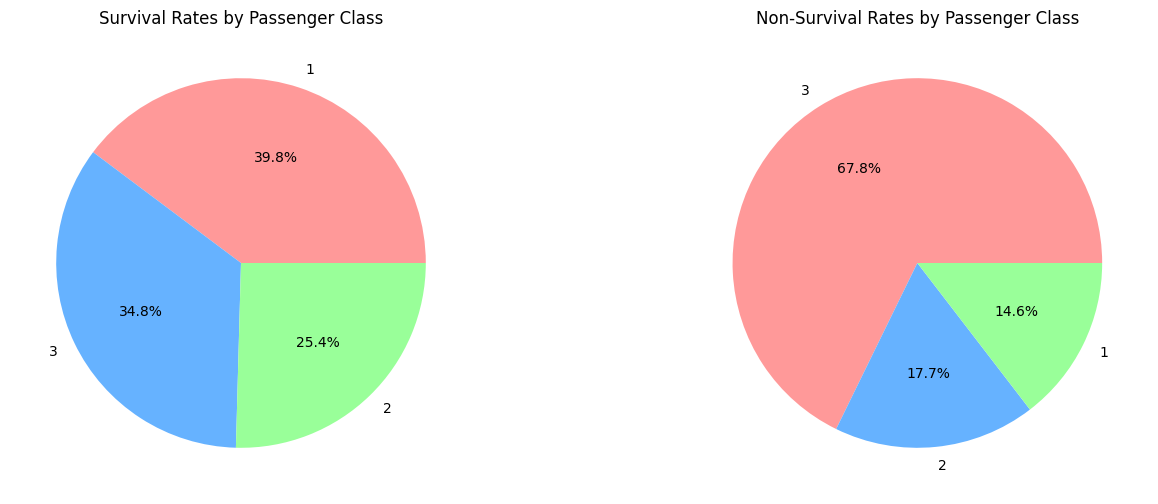

In [38]:
# Subset data for survived and not survived passengers
df_male = df[df['Survived'] == 1]
df_not_survived = df[df['Survived'] == 0]

# Count the number of survivors and non-survivors per Passenger Class
df_survived_count = df_male['Pclass'].value_counts()
df_not_survived_count = df_not_survived['Pclass'].value_counts()

# Define colors for each passenger class
colors = ['#FF9999', '#66B2FF', '#99FF99']

# Generate the two pie charts for survival and non-survival rates by Passenger Class
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot for Survival Rates by Passenger Class
plt.subplot(1, 2, 1)
plt.pie(df_survived_count, labels=df_survived_count.index, autopct='%1.1f%%', colors=colors)
plt.title('Survival Rates by Passenger Class')

# Plot for Non-Survival Rates by Passenger Class
plt.subplot(1, 2, 2)
plt.pie(df_not_survived_count, labels=df_not_survived_count.index, autopct='%1.1f%%', colors=colors)
plt.title('Non-Survival Rates by Passenger Class')

plt.show()

## Task Answer:
Looking at the data and visualizations, we can determine if there is a significant difference in survival rates between passenger classes (1st, 2nd, and 3rd class). It appears that upper-class passengers had a greater chance of surviving compared to lower-class passengers. The pie chart above illustrates that first class had the highest survival rate at 39.8%, and its death rate was also relatively low at 14.7% compared to the other classes.

### Task
# "Women and children first". Was this the case?

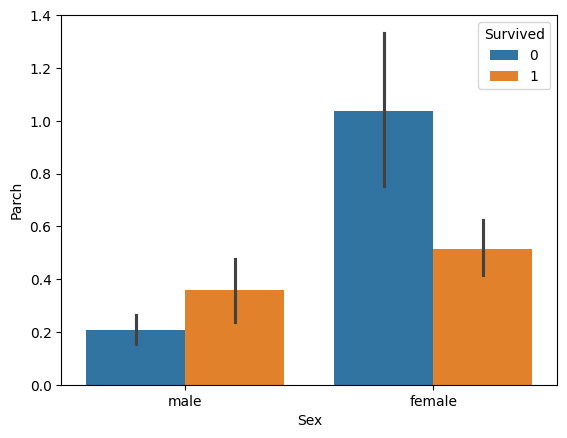

Survived count by sex:
Sex
female    233
male      109
Name: count, dtype: int64


In [13]:
# Create the bar plot
sns.barplot(y='Parch', x='Sex', data=df, hue='Survived')

# Display the plot
plt.show()

survived_count = df[df['Survived'] == 1]['Sex'].value_counts()
print("Survived count by sex:")
print(survived_count)

## Task Answer:
During the Titanic disaster, the principle of prioritizing the safety of women and children was evident in the rescue operations when analyzing the data and visual representation.

### Task
# Adding one of my own observations

<Axes: xlabel='count', ylabel='Embarked'>

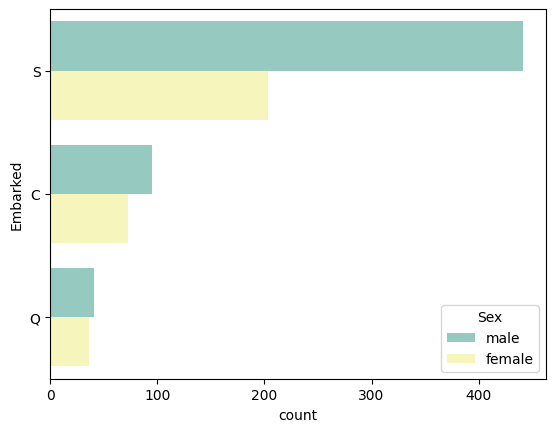

In [59]:
# Visualization the number of people who embarked from Southampton (S), Cherbourg (C), and Queenstown (Q) based on their sex.
sns.countplot(y='Embarked', data=df, hue='Sex')


## Task Answer:
Looking at the visualization, it seems that the majority of people embarked on Southmaptohn, while the least amount chose Queenstown. Additionally, it is evident that there is a higher number of males compared to females in each location.